In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import SGD
import numpy as np
import matplotlib.pyplot as plt

In [3]:
(x_train, y_train),(x_test,y_test) = mnist.load_data()

In [4]:
x_train, x_test = x_train/255.0, x_test / 255.0

In [5]:
model = Sequential (
    [
        Flatten(input_shape=(28,28)),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ]
)

C:\Users\hyper\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
model.compile(optimizer=SGD(learning_rate=0.01),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
history = model.fit(x_train,y_train,epochs=5,validation_split=0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7230 - loss: 1.0743 - val_accuracy: 0.9137 - val_loss: 0.3285
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8970 - loss: 0.3695 - val_accuracy: 0.9265 - val_loss: 0.2651
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9150 - loss: 0.3051 - val_accuracy: 0.9368 - val_loss: 0.2318
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9230 - loss: 0.2758 - val_accuracy: 0.9412 - val_loss: 0.2101
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9279 - loss: 0.2544 - val_accuracy: 0.9473 - val_loss: 0.1934


In [8]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

313/313 - 0s - 1ms/step - accuracy: 0.9361 - loss: 0.2271


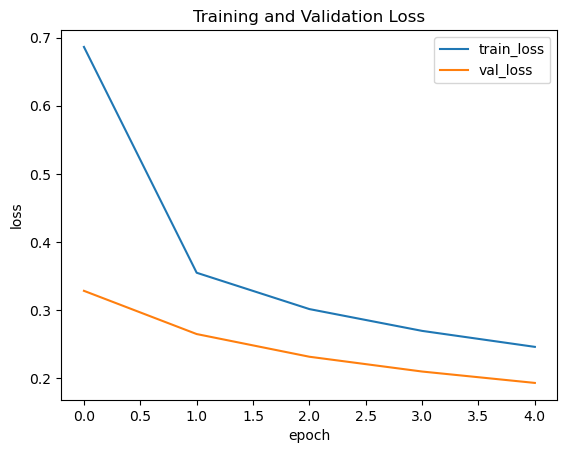

In [9]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

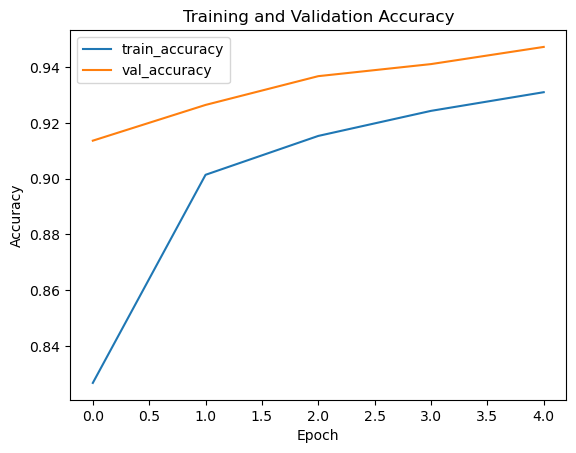

In [10]:
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [11]:
pred = model.predict(x_test[:5])
pred_class = np.argmax(pred[0])
true_class = y_test[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


In [12]:
print(pred_class)
print(true_class)

7
7


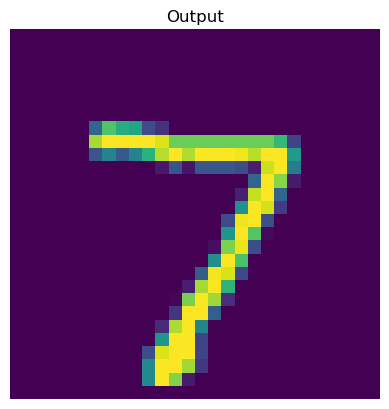

In [15]:
plt.imshow(x_test[0])
plt.title("Output")
plt.axis('off')
plt.show()